## Praca domowa 4

#### Autor: Andrzej Pióro

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

#### a)

In [63]:
df.query("Year>2015 and Publisher=='Nintendo' and NA_Sales < EU_Sales")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


#### b)

In [39]:
df.query("Year==2010").groupby("Genre").Global_Sales.sum().reset_index().nlargest(1, "Global_Sales")

,Genre,Global_Sales
0,Action,117.64


#### c)

In [61]:
df.groupby("Genre")[['EU_Sales', 'JP_Sales']].mean().query("EU_Sales < JP_Sales")\
.reset_index().drop(["EU_Sales"], axis=1).sort_values('JP_Sales', ascending=False)\
.rename(columns = {'Genre':'Typ gry', 'JP_Sales':'Średnia sprzedaż w Japonii'}).reset_index(drop=True)

,Typ gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

#### 1)
Oryginalny wykres pochodzi został stworzony przez Monę Chalabi i został umieszczony 25. października na Facebooku strony edukacyjnej TED

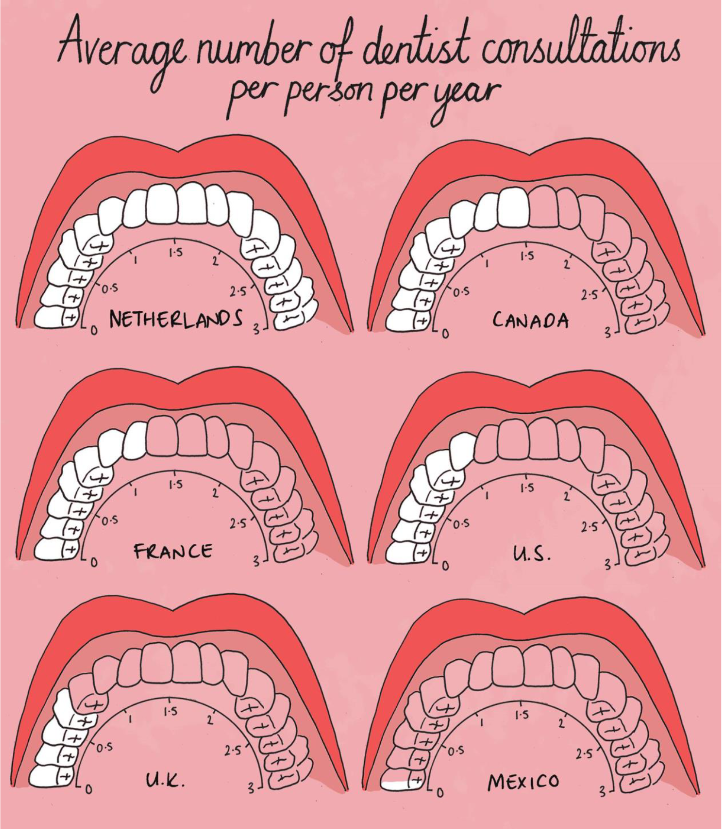

#### 2) 
Link do raportu, z którego pochodzi wykres ggplot:
https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/PioroAndrzej/raport.pdf

Wykres ggplot:
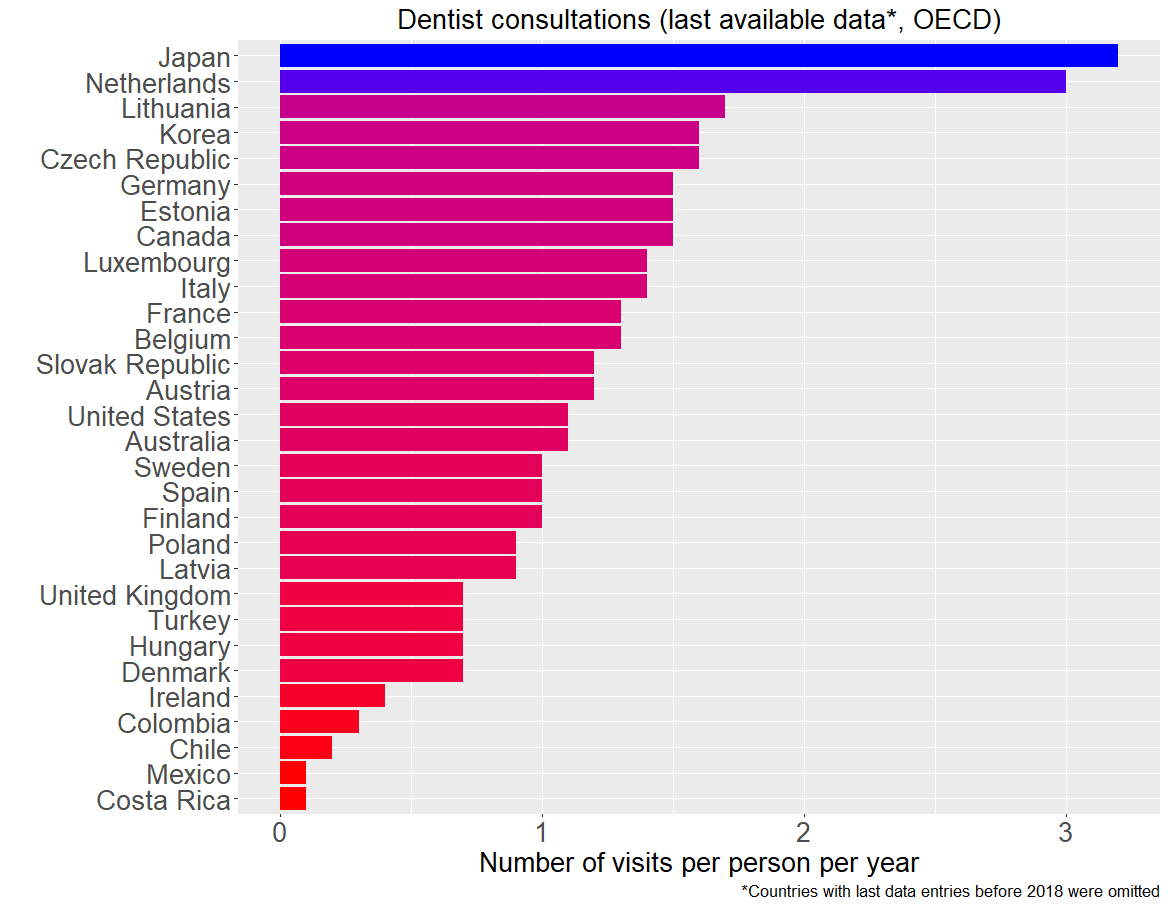

#### 3)

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0, -45, '*Countries with last data entries before 2018 were omitted')

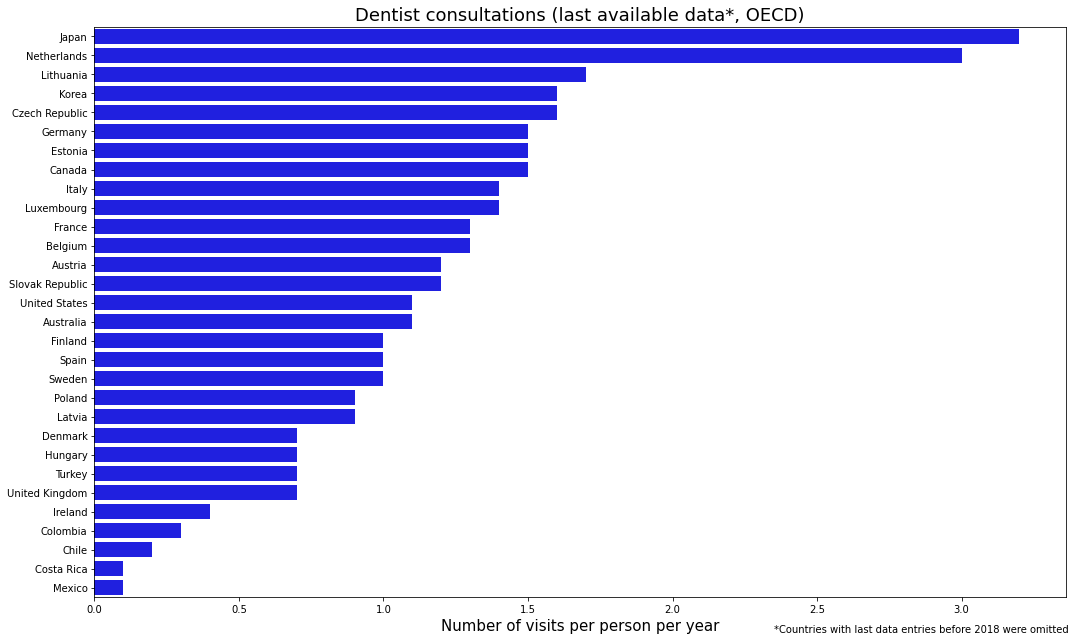

In [126]:
df = pd.read_csv("consultations_data.csv")[["Country", "Value"]]
df

fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(y = "Country",
            x = "Value",
            data =df, color="blue",
            order=df.sort_values('Value', ascending=False).Country,
           ax = ax)
# set labels
plt.xlabel("Number of visits per person per year", size=15)
plt.ylabel("", size=15)
plt.title("Dentist consultations (last available data*, OECD)", size=18)
plt.tight_layout()
ax.annotate(text='*Countries with last data entries before 2018 were omitted',
            xy=(2.35, 29),
            xycoords='data',
            fontsize=10,
            xytext=(0, -45),
            textcoords='offset points')


#### 4)
Wykres  stworzony przy pomocy seaborn jest najlepszy, gdyż:
* nie zawiera mylących elementów wykresu oryginalnego,
* przedstawia szerszą sytuację, nie tylko wybrane kraje
* zawiera źródło danych
* słupki są w jednolitym kolorze